<a href="https://colab.research.google.com/github/AYUSH-002/EDA-TH/blob/master/Exploratory_Data_Analysis_Theory(TH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [9]:
def load_and_explore_data(file_path):
    print("=" * 50)
    print("1. DATA LOADING AND INITIAL EXPLORATION")
    print("=" * 50)

    data = pd.read_csv(file_path)

    print("\n1.1 Dataset Overview:")
    print(f"• Number of rows: {data.shape[0]}")
    print(f"• Number of columns: {data.shape[1]}")
    print("\n1.2 Data Types:")
    print(data.dtypes)

    return data


In [10]:
def clean_data(data):
    print("\n" + "=" * 50)
    print("2. DATA CLEANING AND PREPROCESSING")
    print("=" * 50)

    cleaned_data = data.copy()

    cleaned_data = cleaned_data.dropna()

    cleaned_data = cleaned_data.drop_duplicates()

    categorical_cols = cleaned_data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        cleaned_data[col] = cleaned_data[col].astype('category')

    return cleaned_data


In [11]:
def univariate_analysis(data):
    print("\n" + "=" * 50)
    print("3. UNIVARIATE ANALYSIS")
    print("=" * 50)

    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = data.select_dtypes(include=['category']).columns

    print("\n3.1 Summary Statistics for Numerical Variables:")
    print(data[numerical_cols].describe(), "\n")

    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

    print("\n3.2 Frequency Counts for Categorical Variables:")
    for col in categorical_cols:
        print(f"\nFrequency distribution for {col}:")
        print(data[col].value_counts())
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=data)
        plt.title(f'Distribution of {col}')
        plt.show()


In [12]:
def bivariate_analysis(data):
    print("\n" + "=" * 50)
    print("4. BIVARIATE ANALYSIS")
    print("=" * 50)

    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = data.select_dtypes(include=['category']).columns

    print("\n4.1 Correlation Analysis for Numerical Variables:")
    correlation_matrix = data[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix for Numerical Variables')
    plt.show()

    print("\n4.2 Numerical vs Categorical Relationships:")
    for num_col in numerical_cols:
        for cat_col in categorical_cols:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=cat_col, y=num_col, data=data)
            plt.title(f'{num_col} by {cat_col}')
            plt.show()


In [13]:
def multivariate_analysis(data):
    print("\n" + "=" * 50)
    print("5. MULTIVARIATE ANALYSIS")
    print("=" * 50)

    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

    if len(numerical_cols) > 2:
        from sklearn.preprocessing import StandardScaler
        from sklearn.decomposition import PCA

        print("\n5.1 Principal Component Analysis:")

        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data[numerical_cols])

        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_data)

        plt.figure(figsize=(10, 5))
        plt.bar(range(1, 3), pca.explained_variance_ratio_, tick_label=['PC1', 'PC2'])
        plt.title('Explained Variance by Principal Components')
        plt.xlabel('Principal Components')
        plt.ylabel('Variance Explained')
        plt.show()


1. DATA LOADING AND INITIAL EXPLORATION

1.1 Dataset Overview:
• Number of rows: 4877
• Number of columns: 19

1.2 Data Types:
rownames      int64
stateur     float64
statemb       int64
state         int64
age           int64
tenure        int64
joblost      object
nwhite       object
school12     object
sex          object
bluecol      object
smsa         object
married      object
dkids        object
dykids       object
yrdispl       int64
rr          float64
head         object
ui           object
dtype: object

2. DATA CLEANING AND PREPROCESSING

3. UNIVARIATE ANALYSIS

3.1 Summary Statistics for Numerical Variables:
          rownames      stateur      statemb        state          age  \
count  4877.000000  4877.000000  4877.000000  4877.000000  4877.000000   
mean   2439.000000     7.511031   180.660242    52.808079    36.129998   
std    1408.012962     2.500579    43.241595    25.834967    10.600737   
min       1.000000     2.200000    84.000000    11.000000    20.000000   


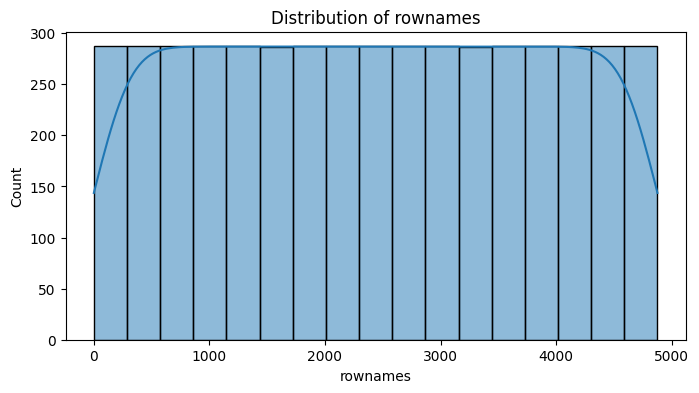

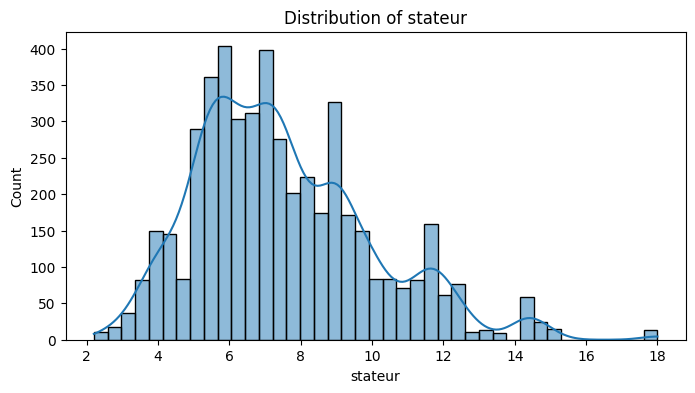

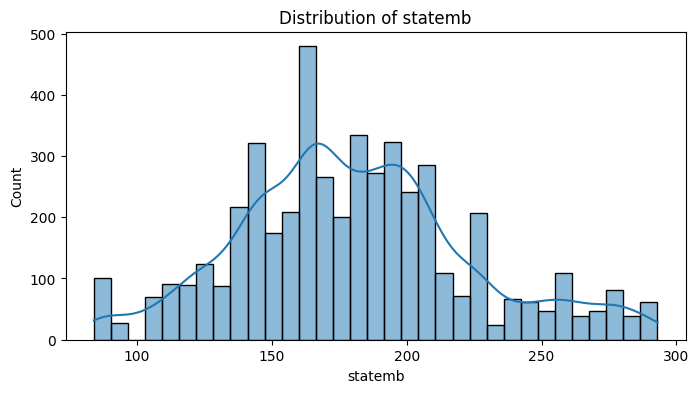

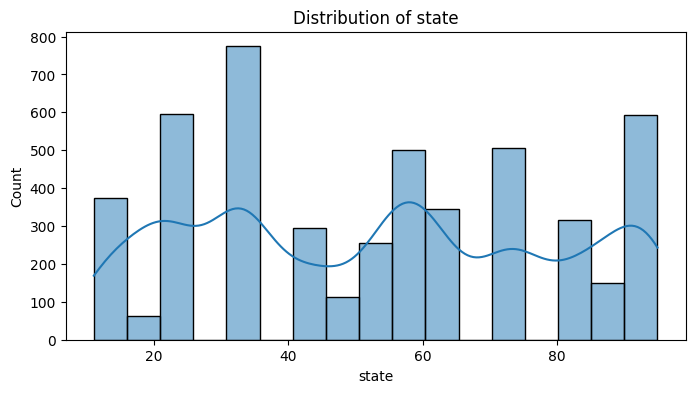

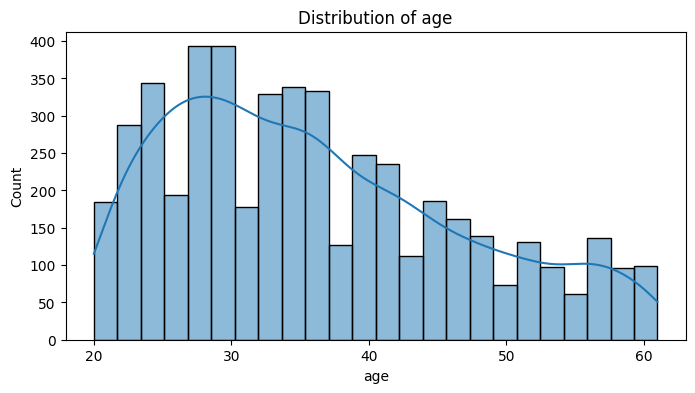

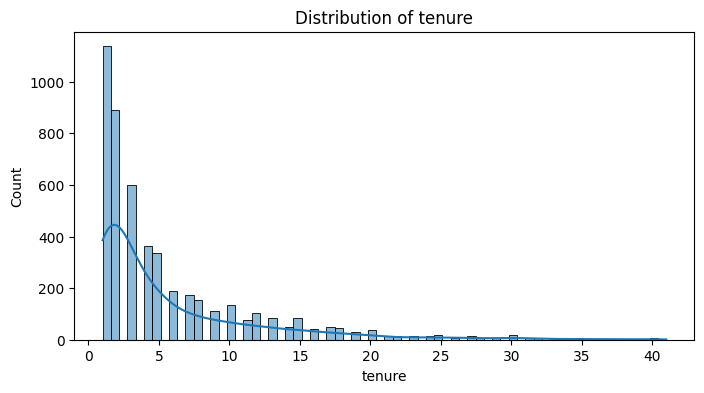

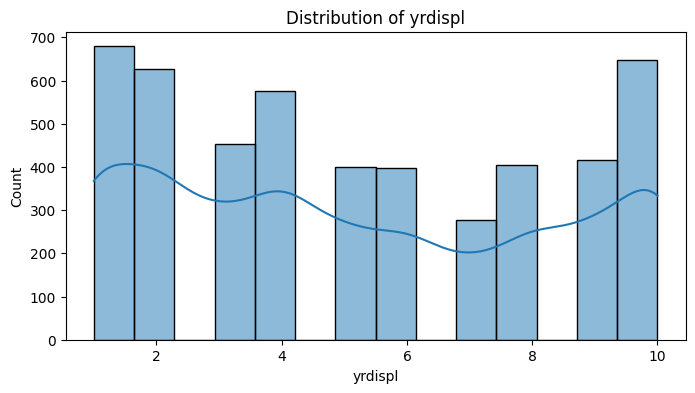

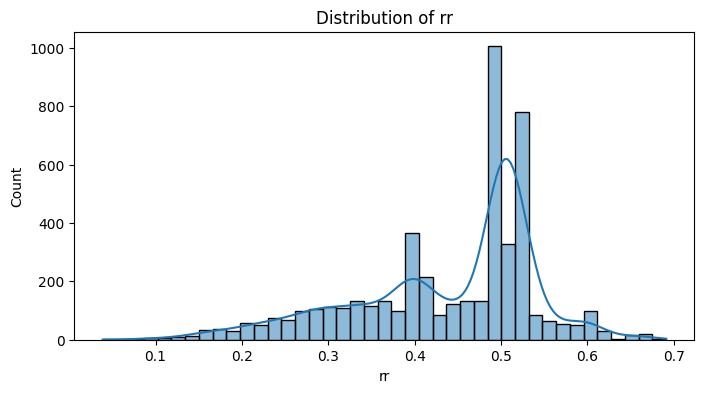


3.2 Frequency Counts for Categorical Variables:

Frequency distribution for joblost:
joblost
slack_work            2322
other                 1976
position_abolished     402
seasonal_job_ended     177
Name: count, dtype: int64


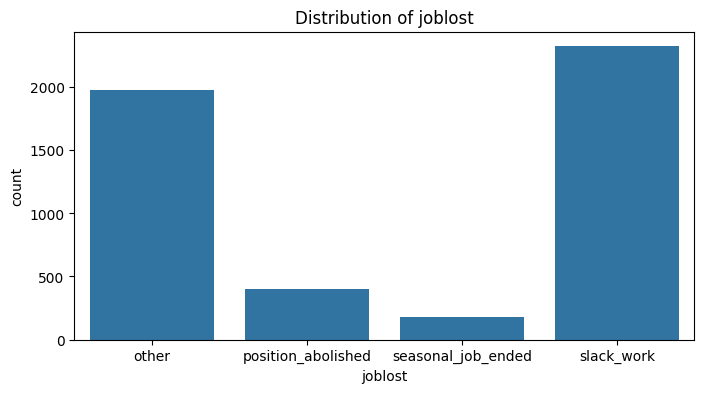


Frequency distribution for nwhite:
nwhite
no     4159
yes     718
Name: count, dtype: int64


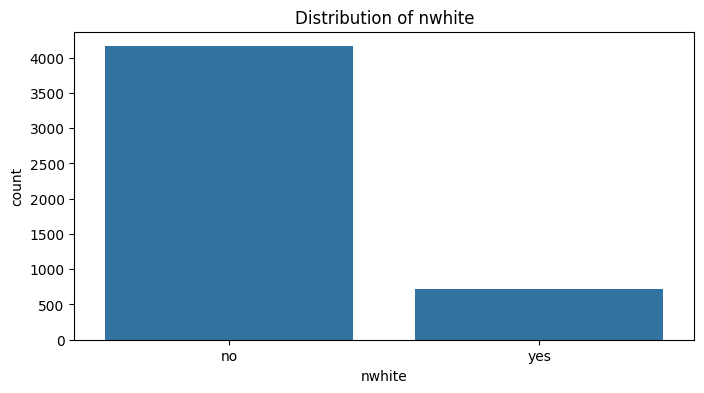


Frequency distribution for school12:
school12
no     3950
yes     927
Name: count, dtype: int64


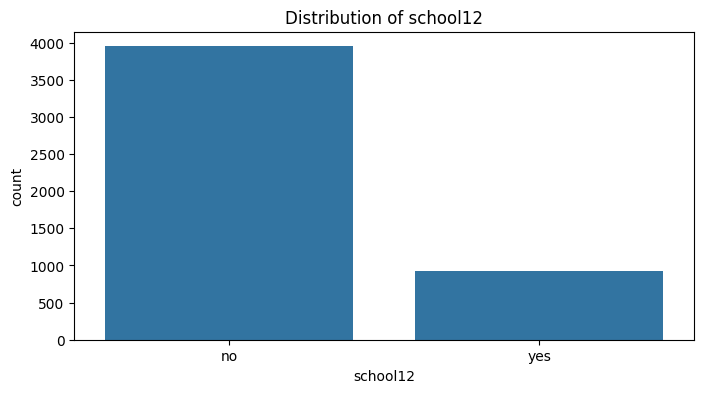


Frequency distribution for sex:
sex
male      3727
female    1150
Name: count, dtype: int64


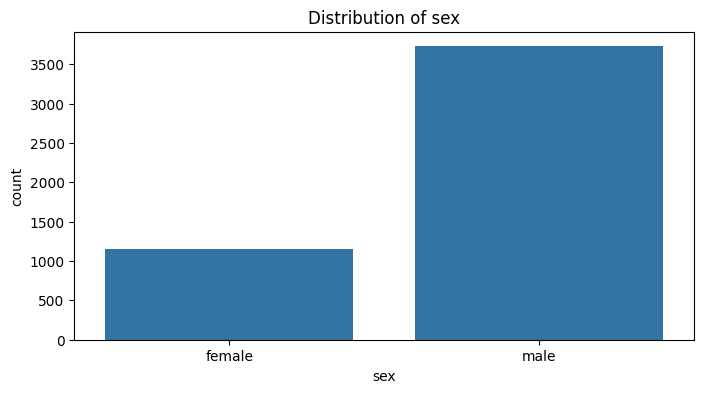


Frequency distribution for bluecol:
bluecol
yes    4877
Name: count, dtype: int64


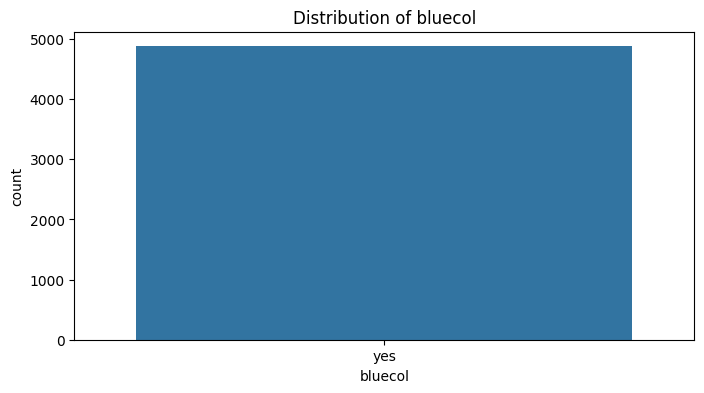


Frequency distribution for smsa:
smsa
yes    3183
no     1694
Name: count, dtype: int64


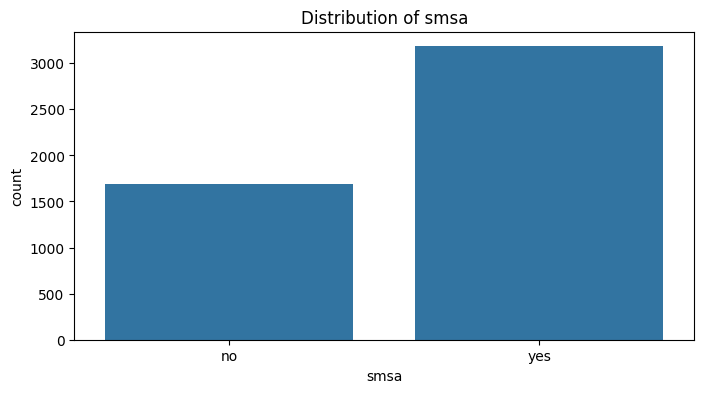


Frequency distribution for married:
married
yes    3086
no     1791
Name: count, dtype: int64


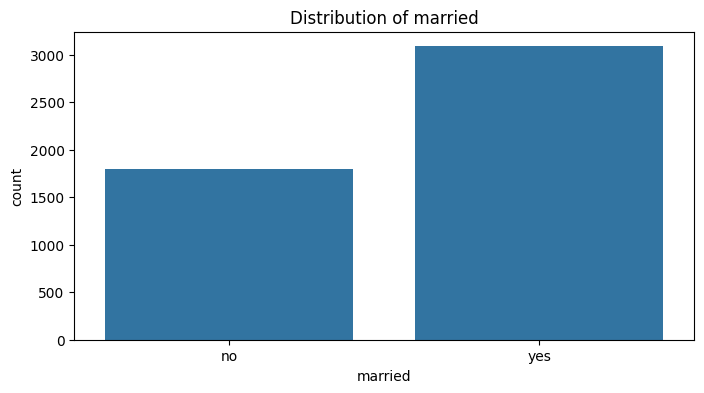


Frequency distribution for dkids:
dkids
no     2508
yes    2369
Name: count, dtype: int64


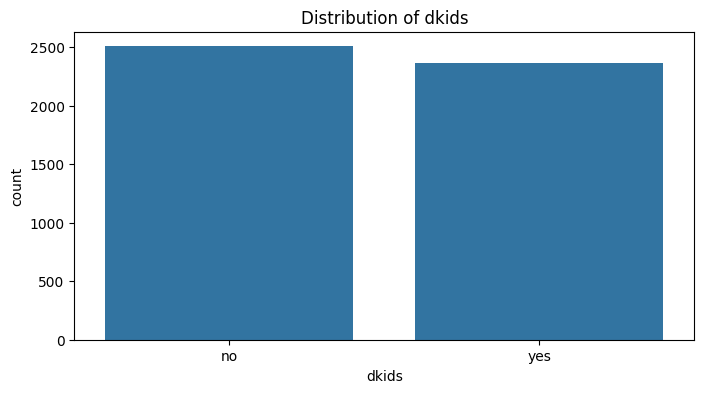


Frequency distribution for dykids:
dykids
no     3796
yes    1081
Name: count, dtype: int64


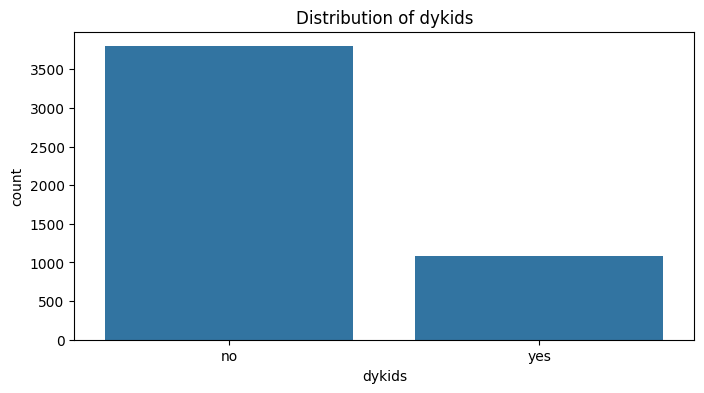


Frequency distribution for head:
head
yes    3319
no     1558
Name: count, dtype: int64


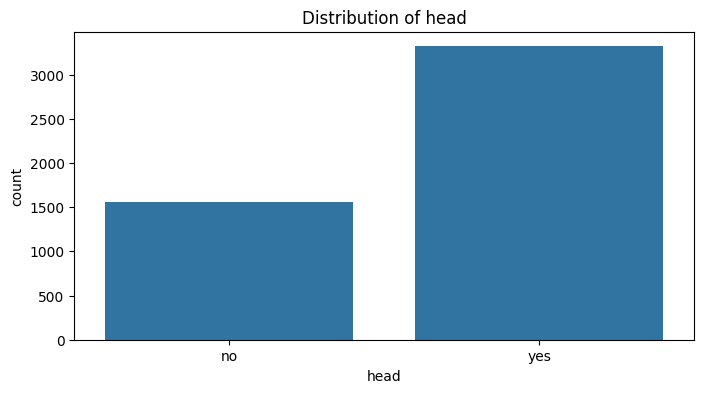


Frequency distribution for ui:
ui
yes    3335
no     1542
Name: count, dtype: int64


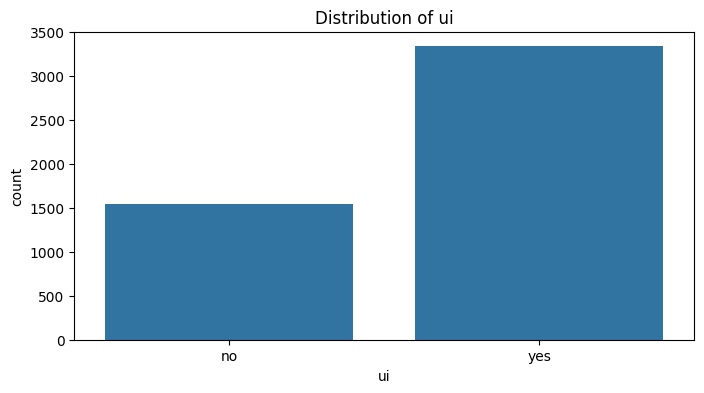


4. BIVARIATE ANALYSIS

4.1 Correlation Analysis for Numerical Variables:


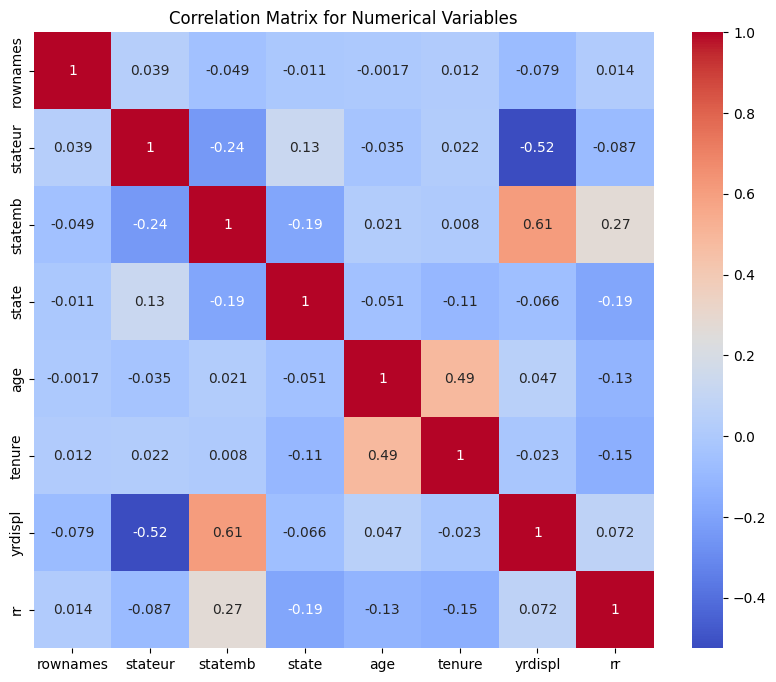


4.2 Numerical vs Categorical Relationships:


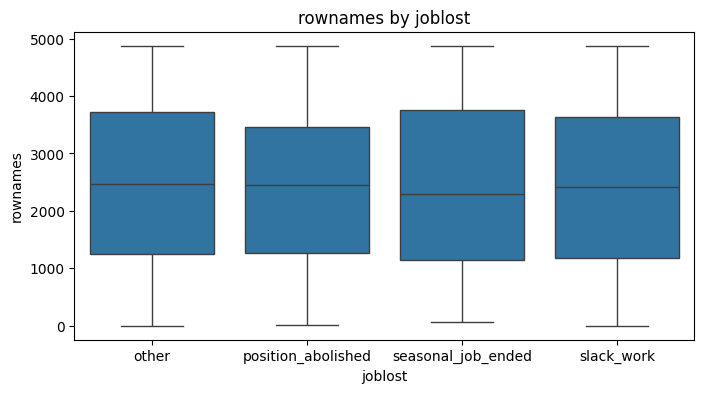

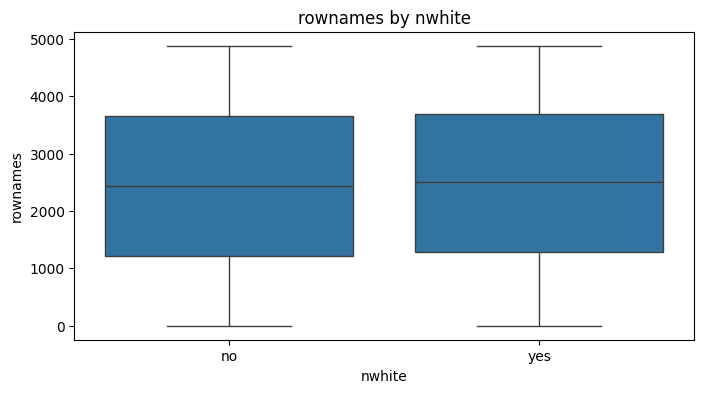

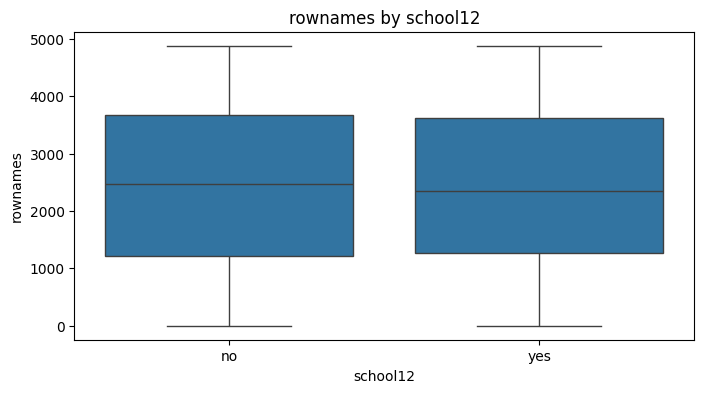

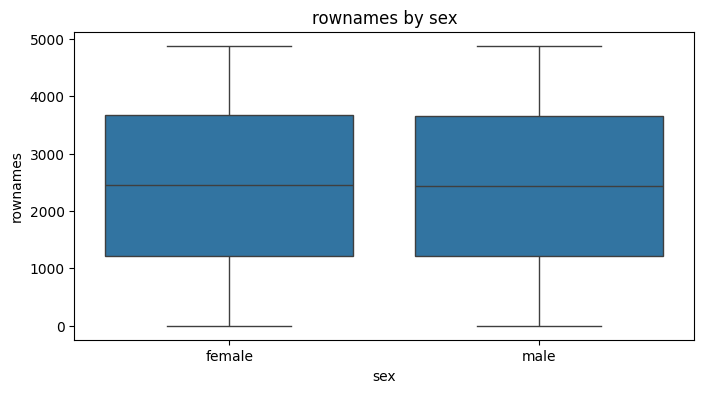

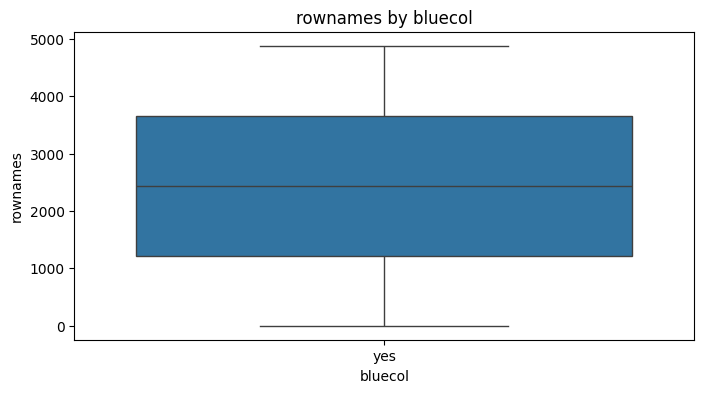

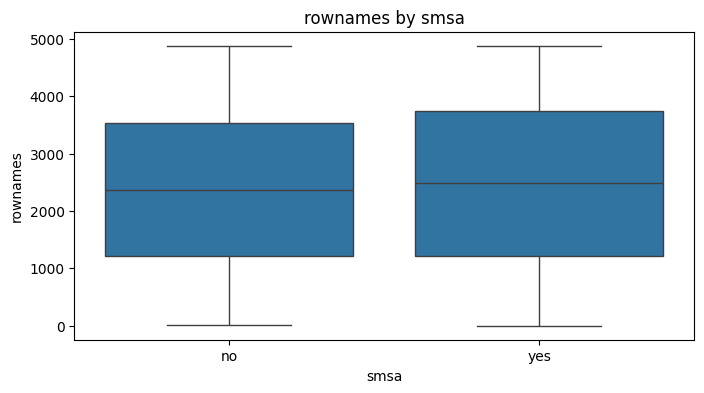

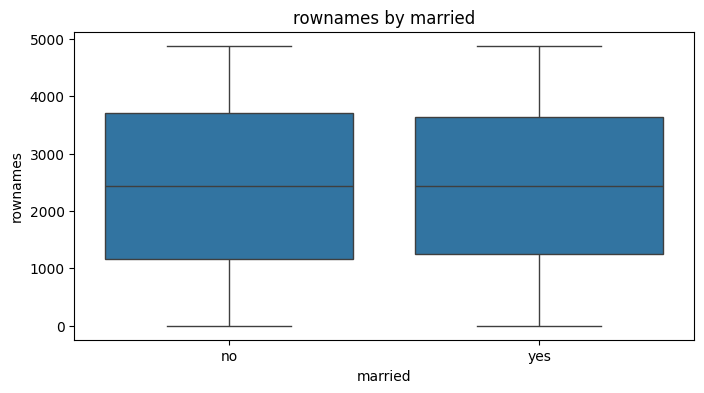

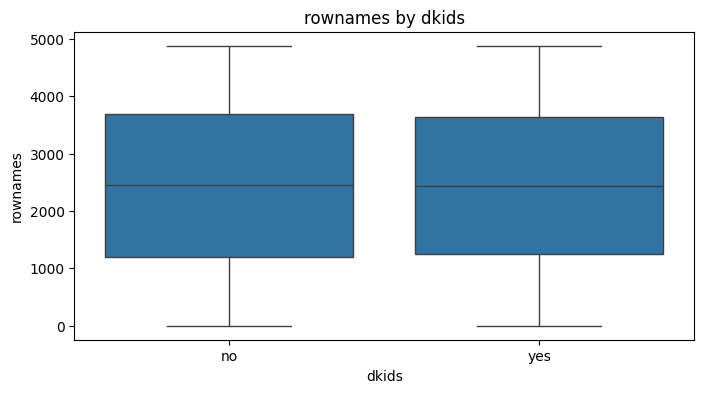

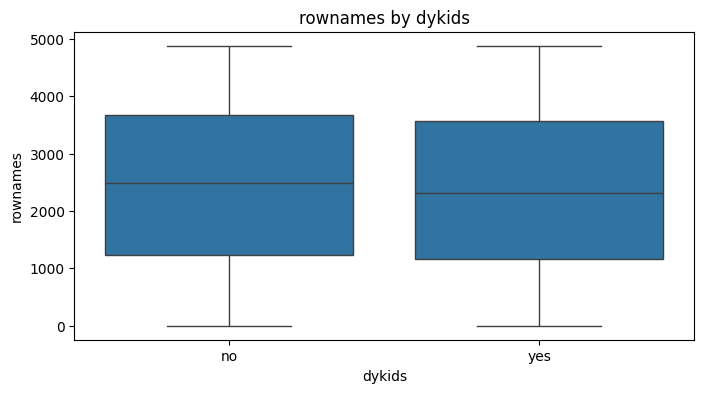

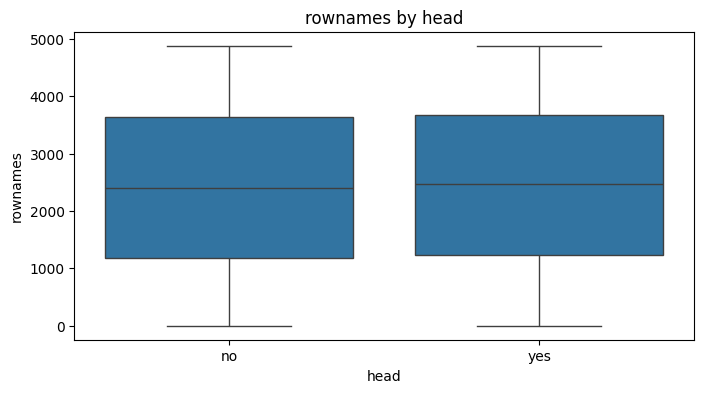

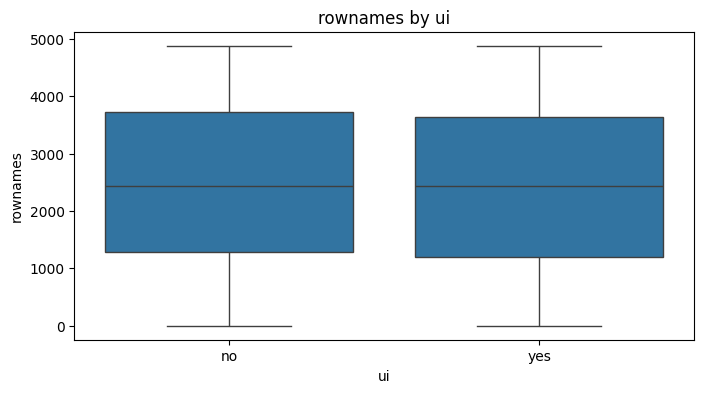

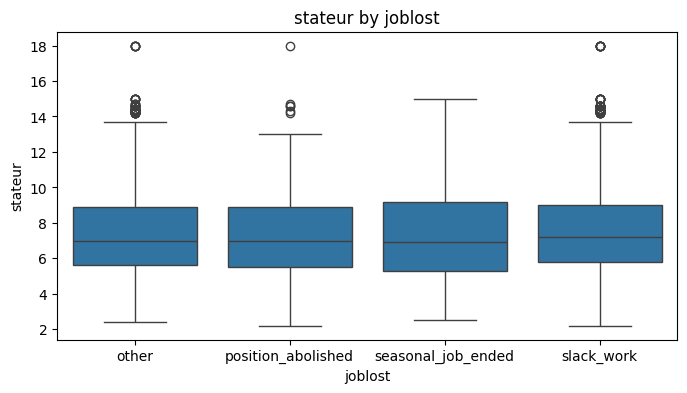

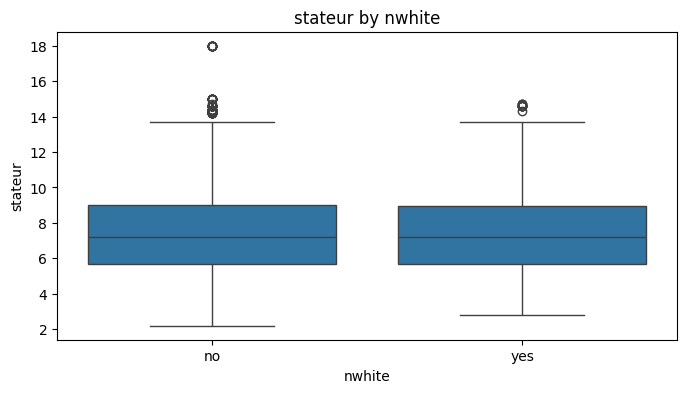

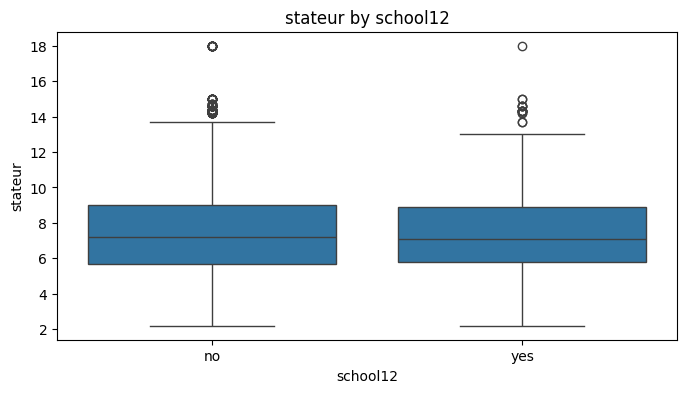

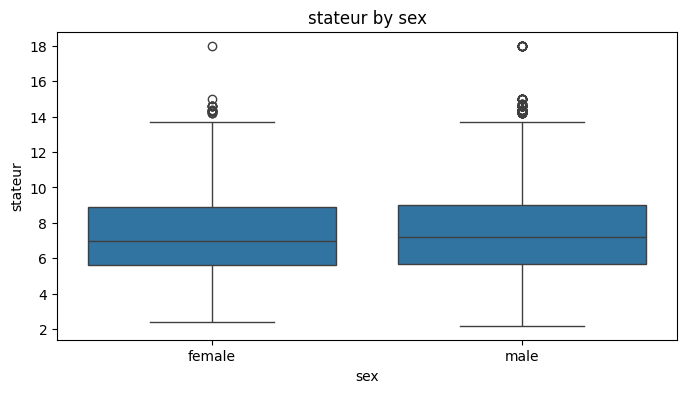

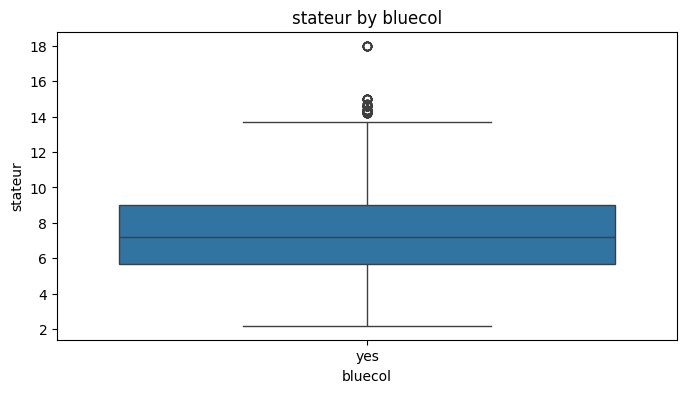

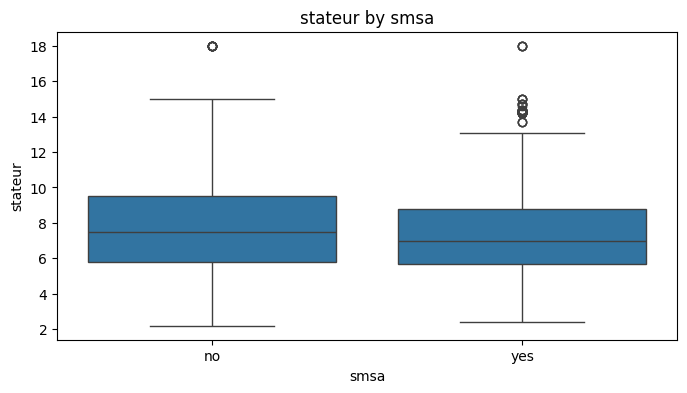

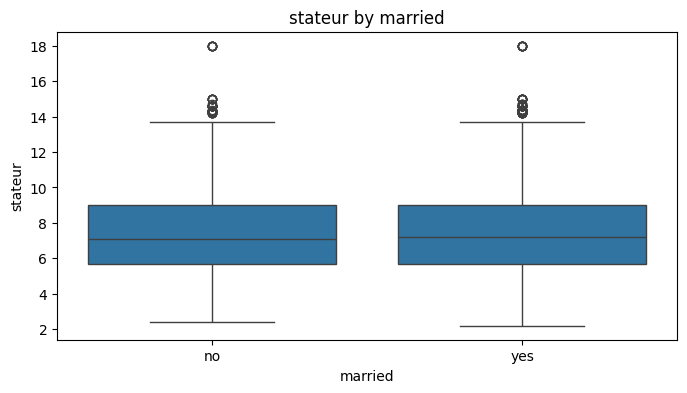

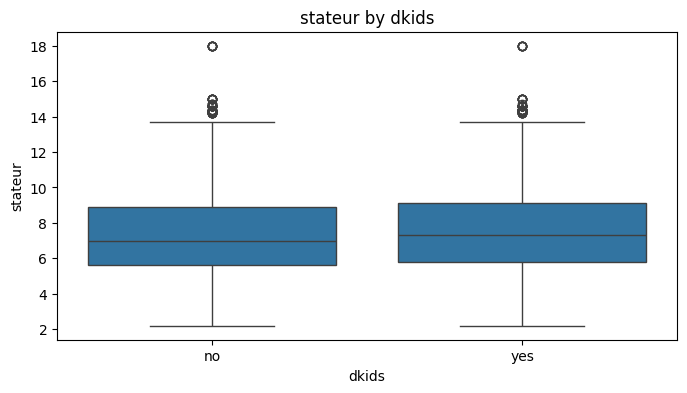

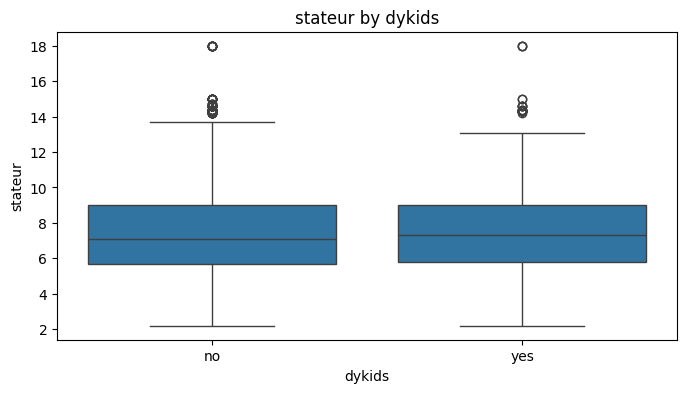

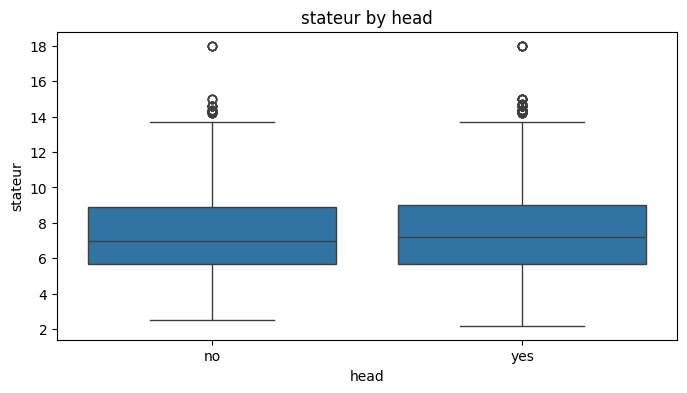

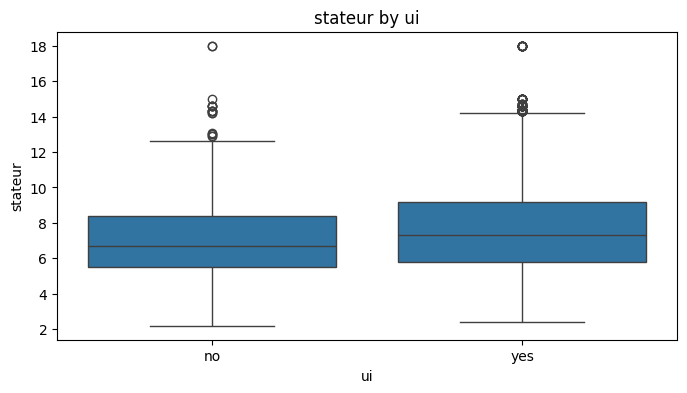

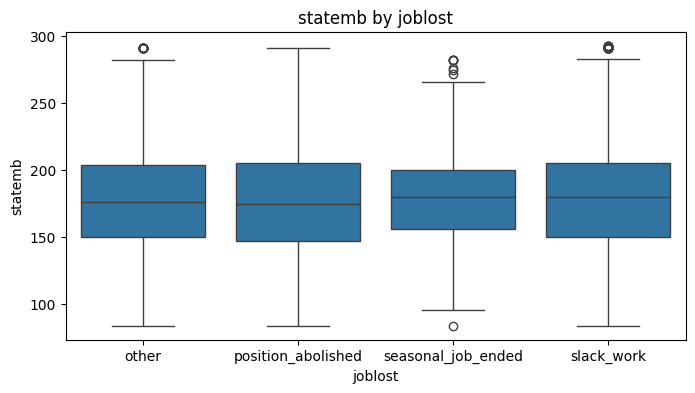

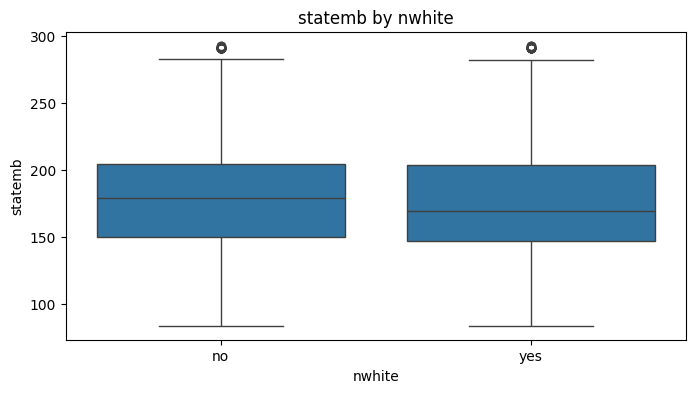

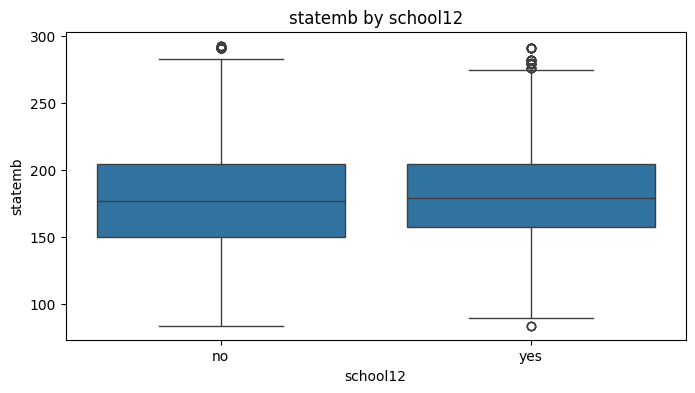

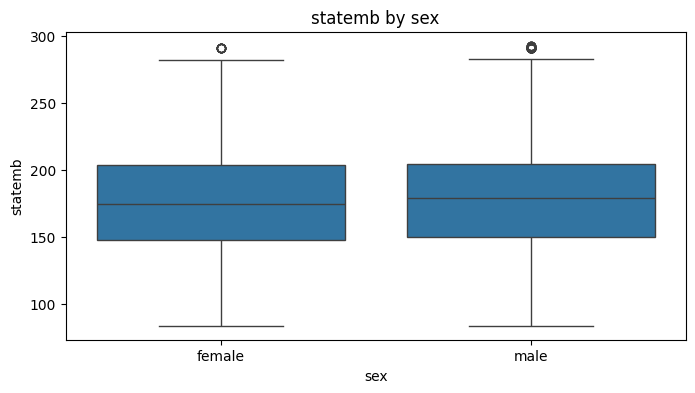

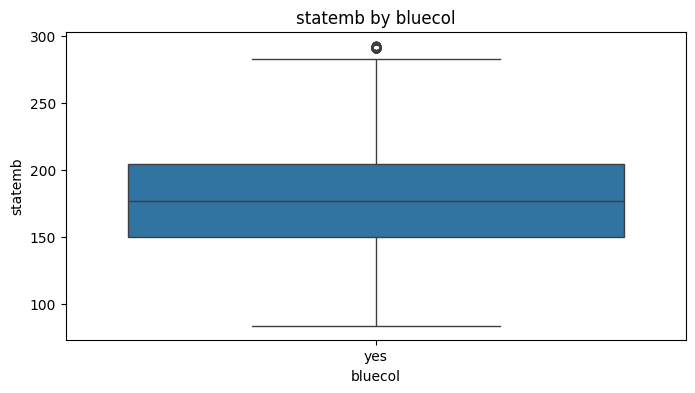

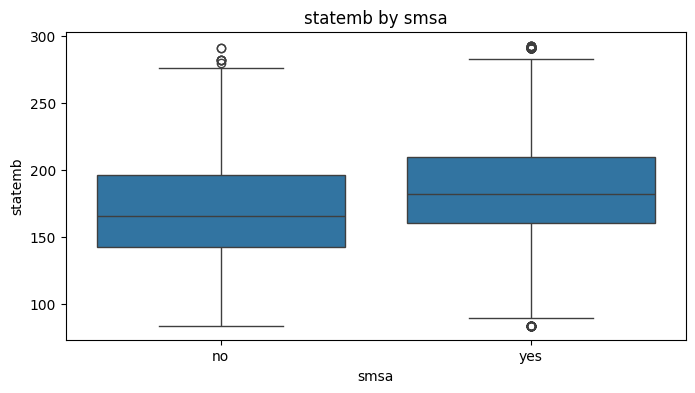

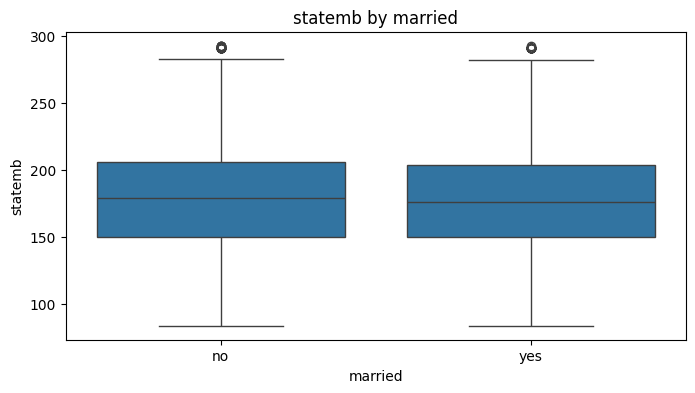

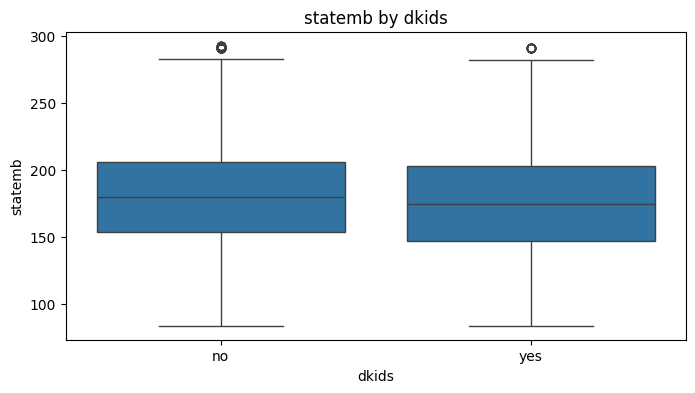

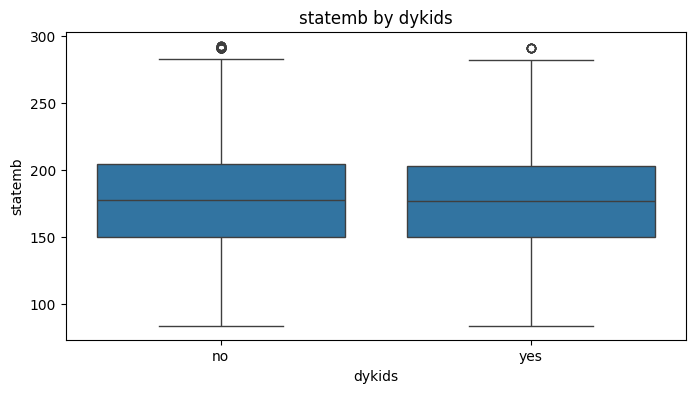

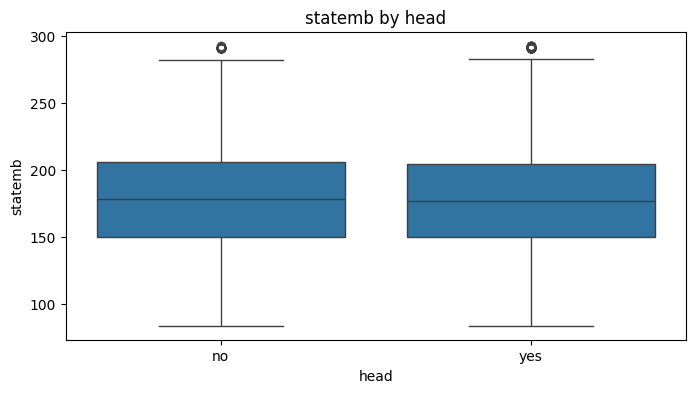

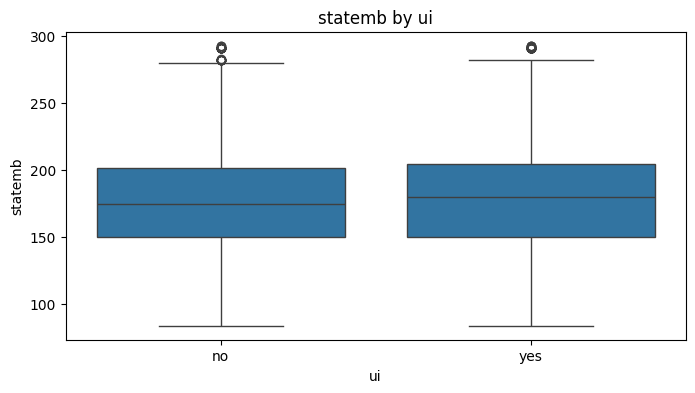

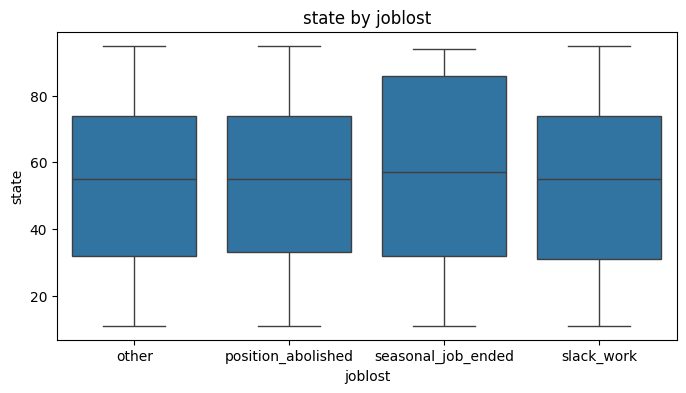

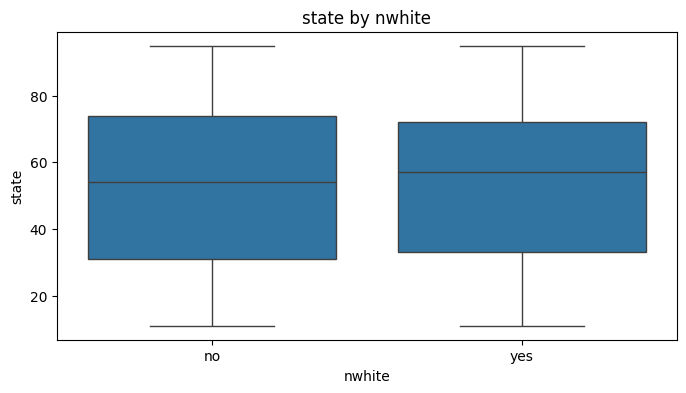

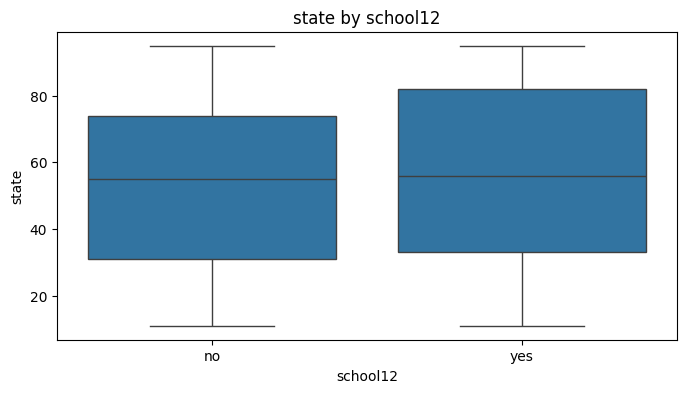

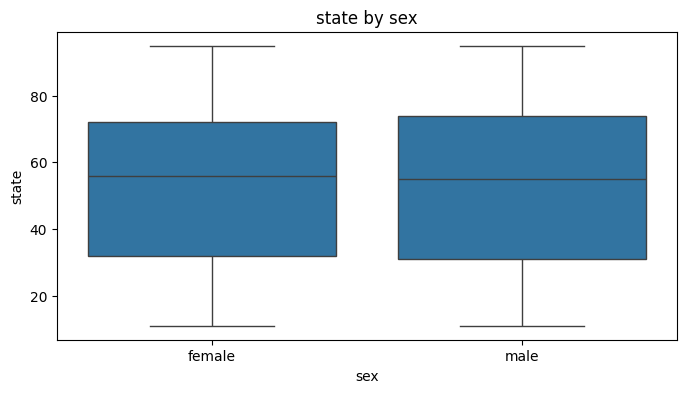

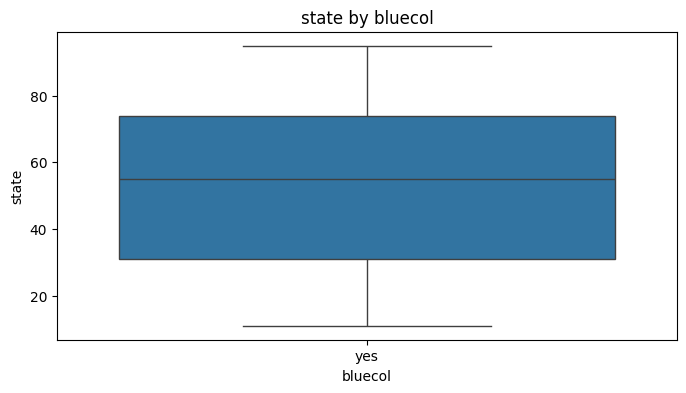

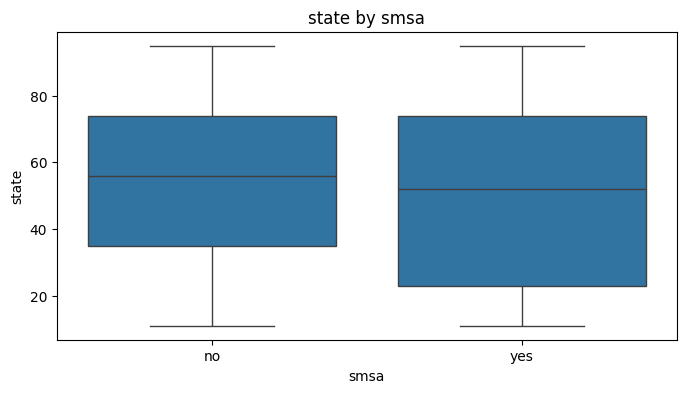

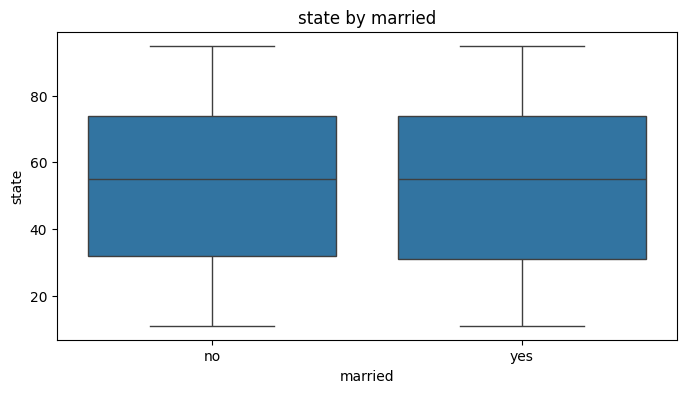

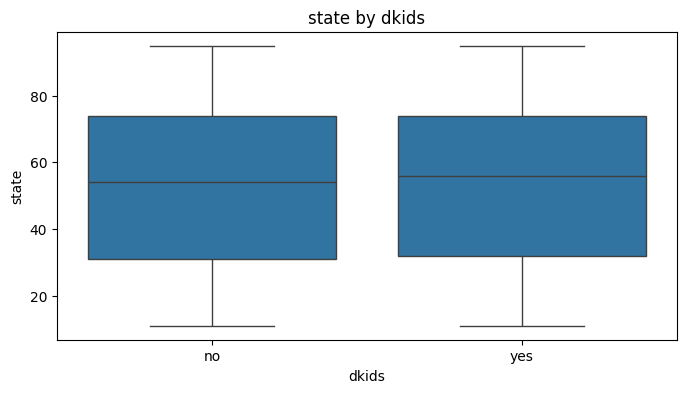

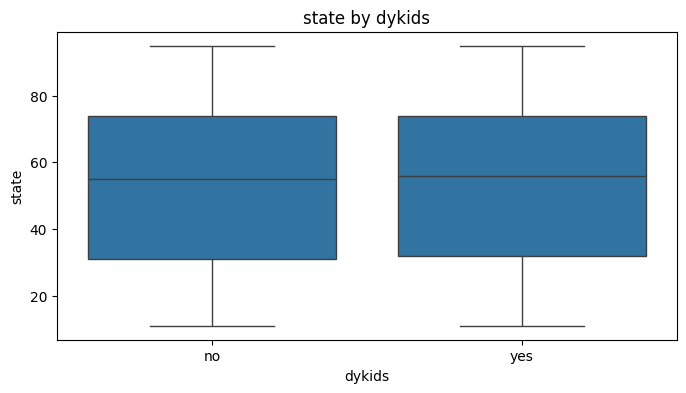

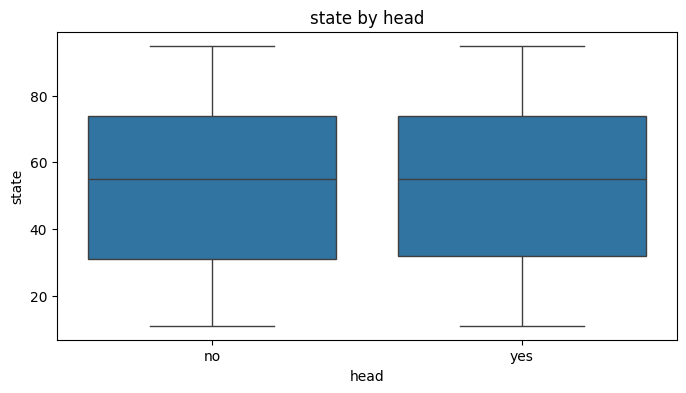

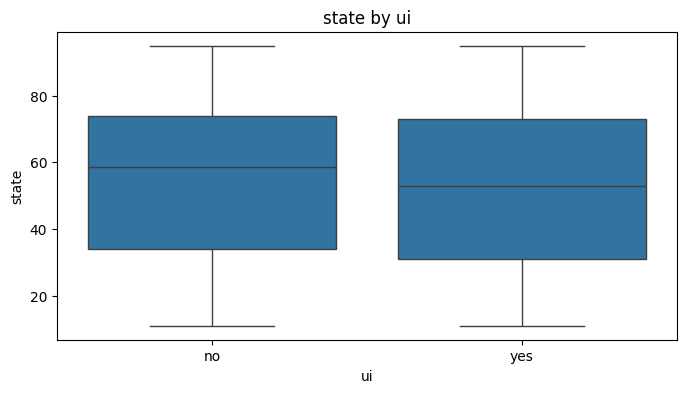

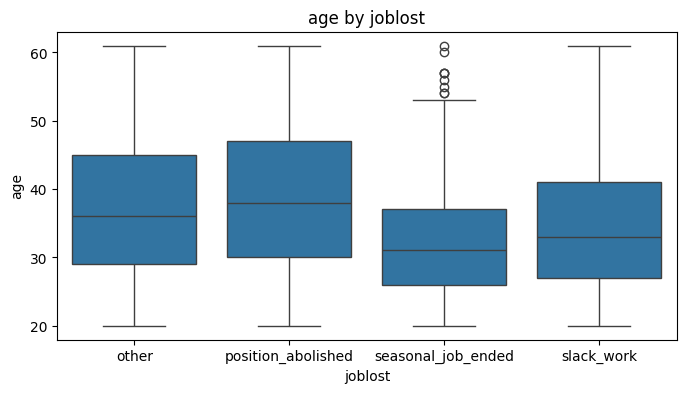

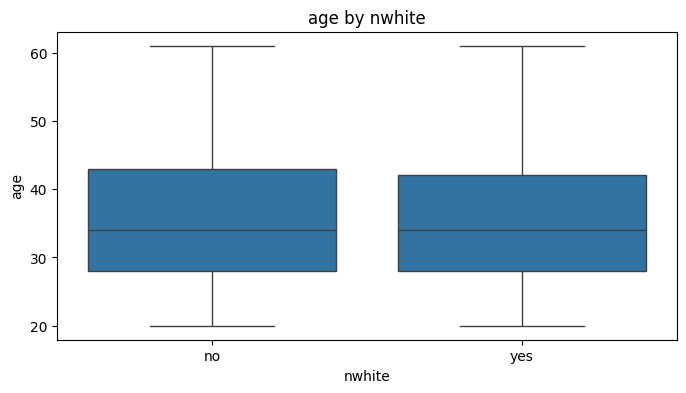

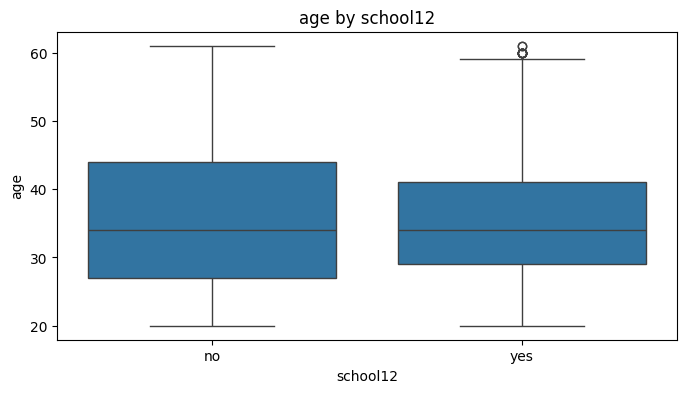

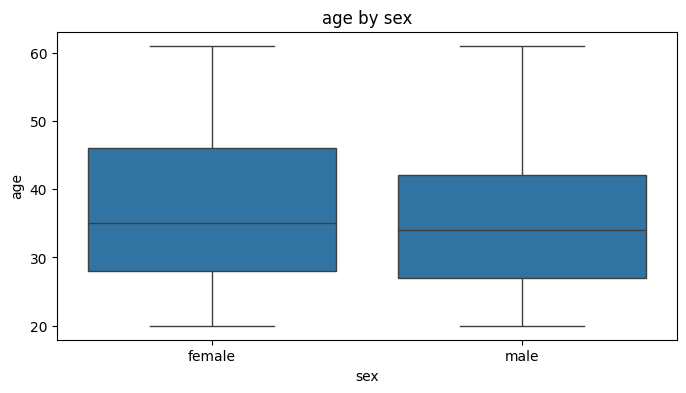

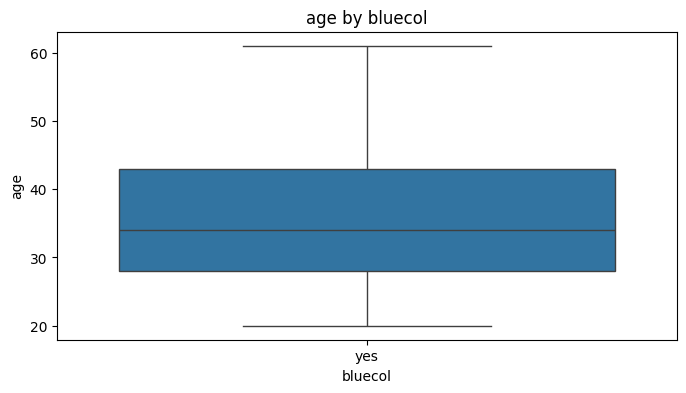

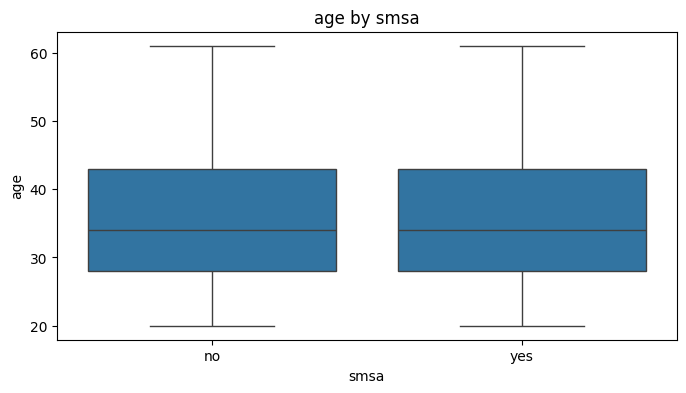

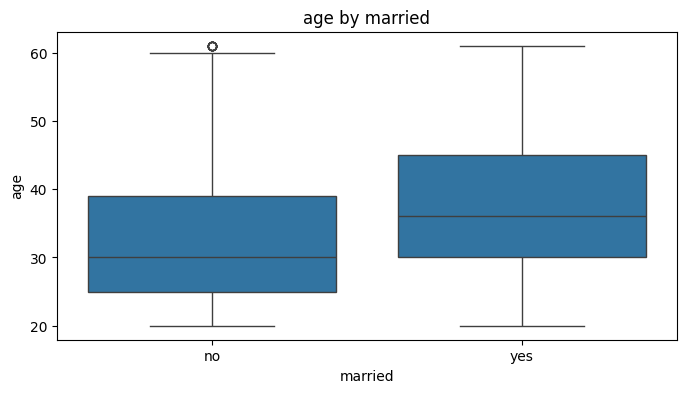

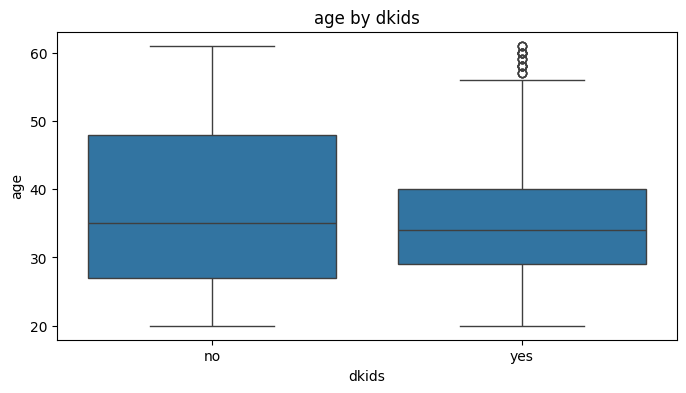

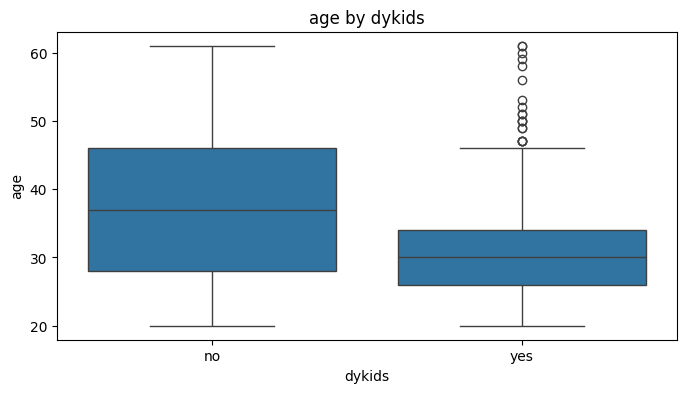

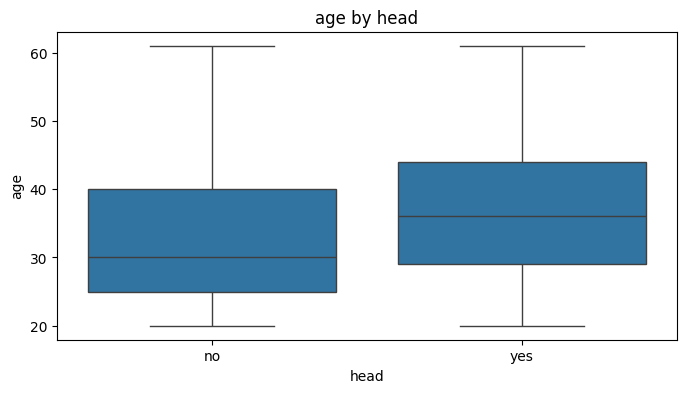

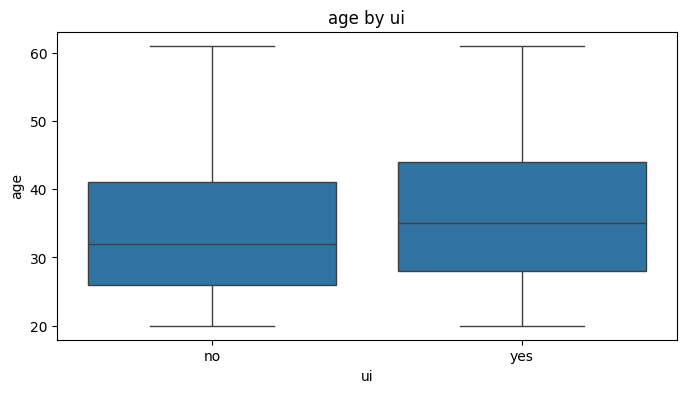

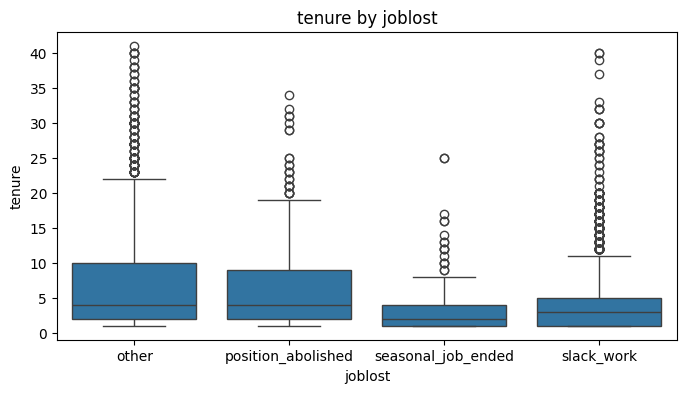

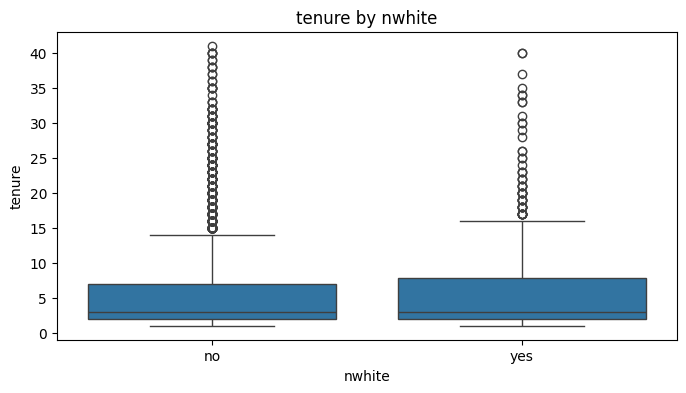

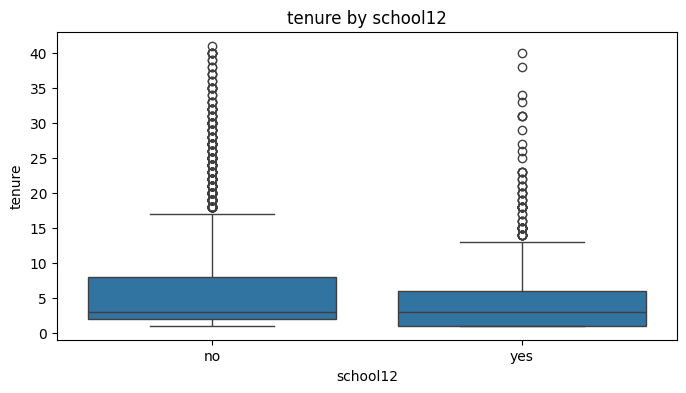

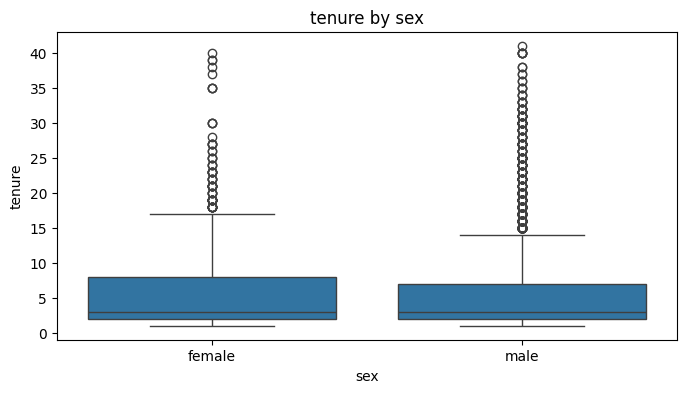

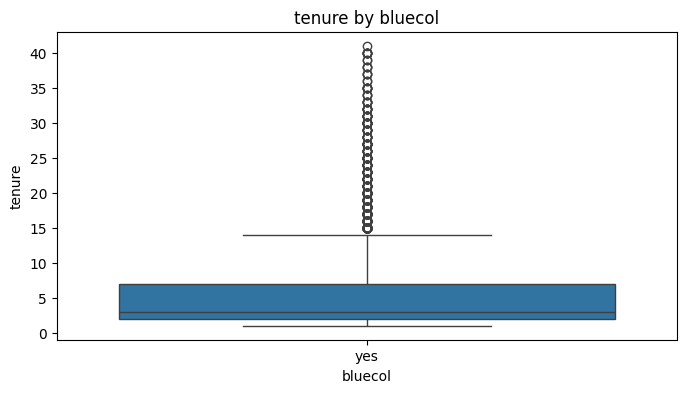

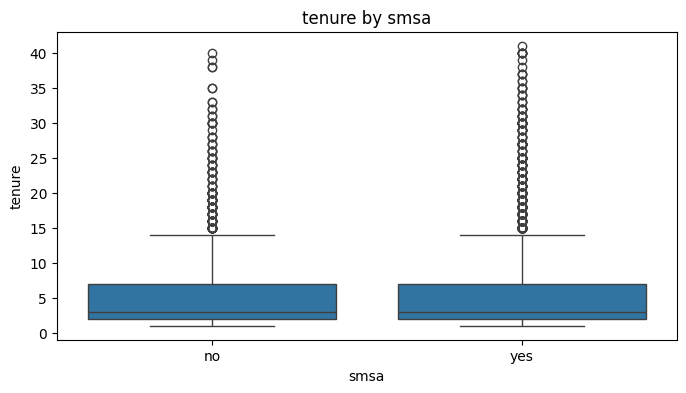

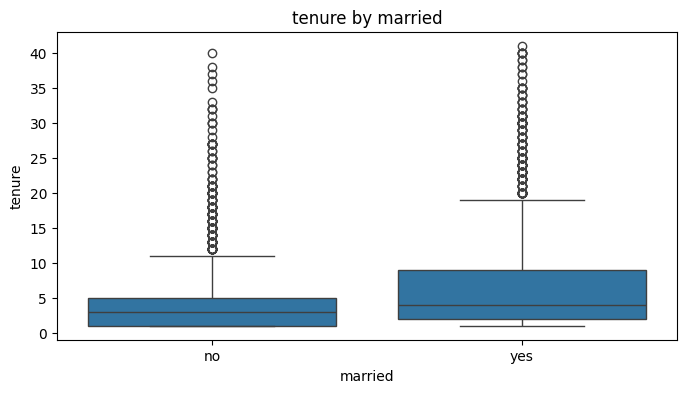

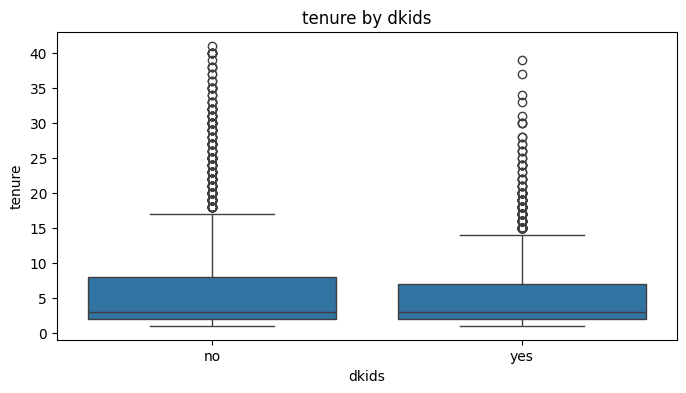

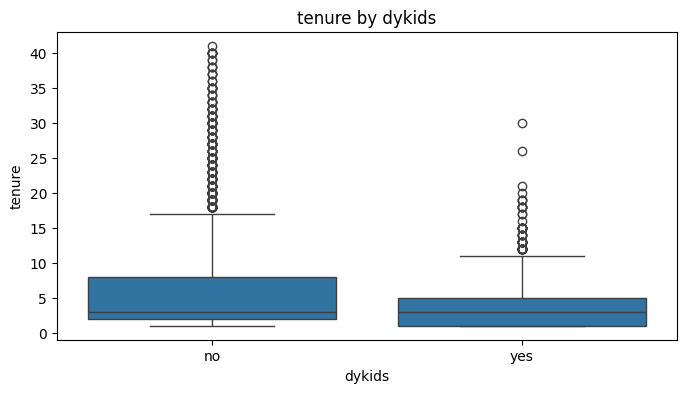

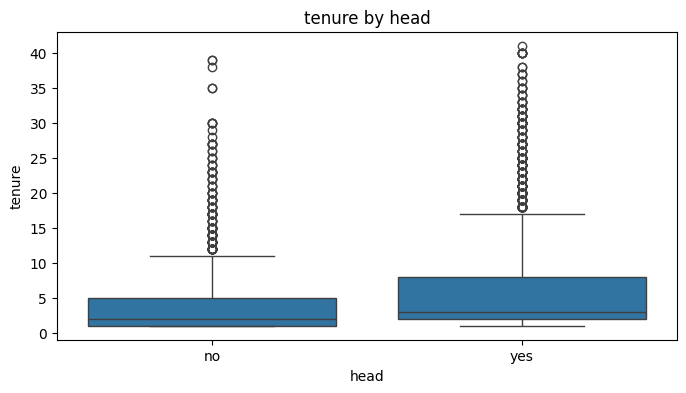

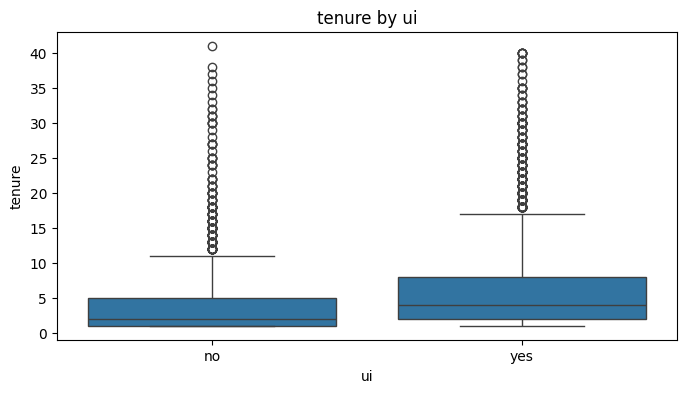

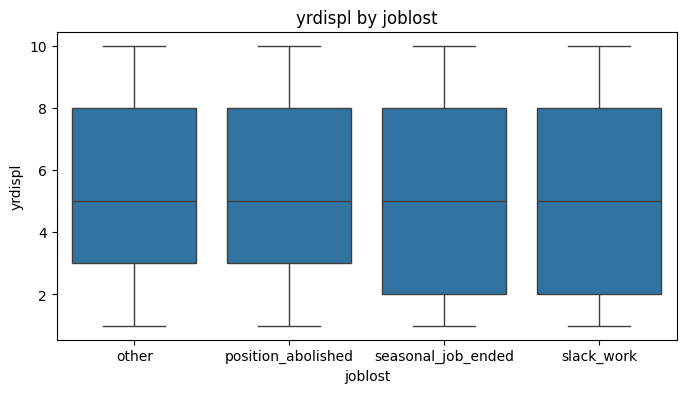

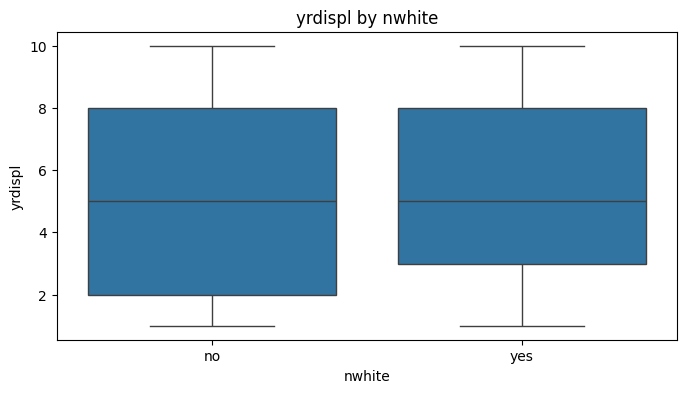

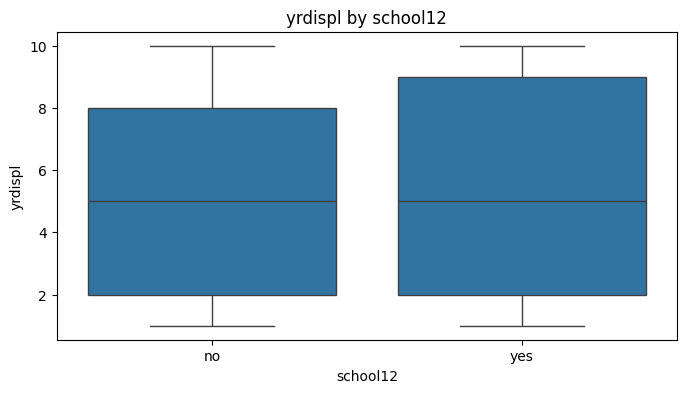

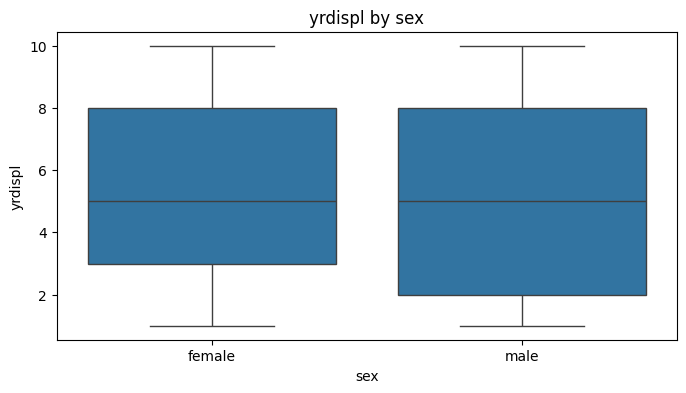

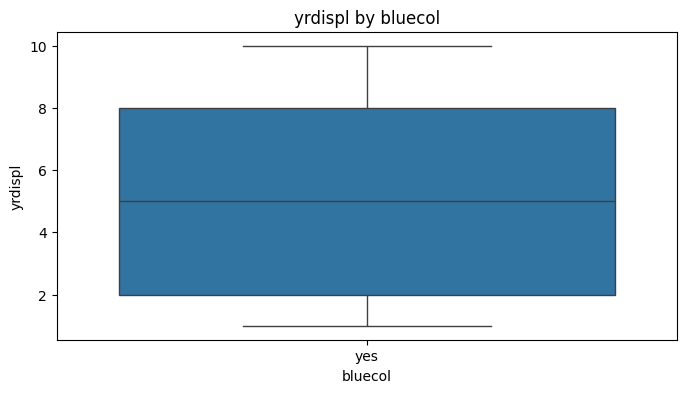

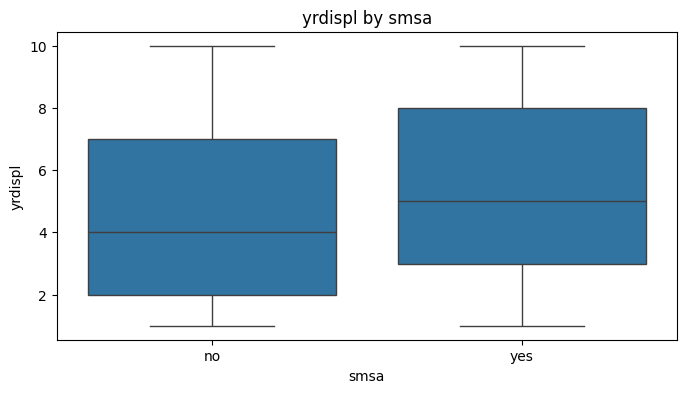

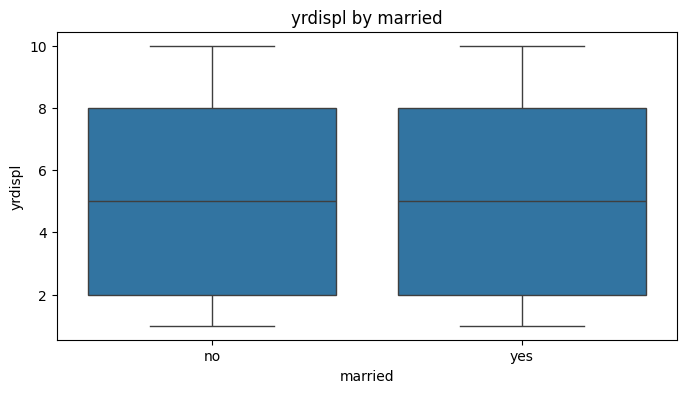

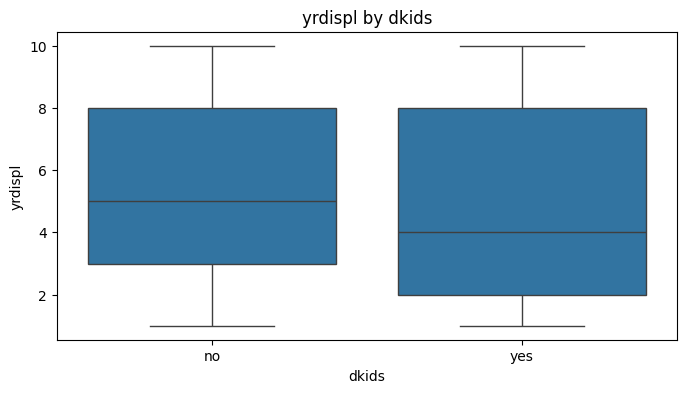

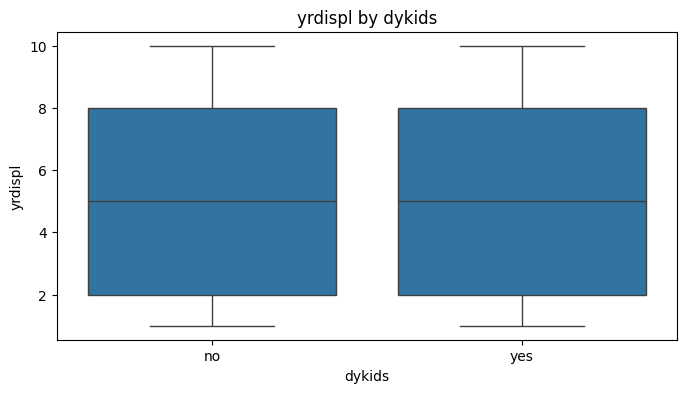

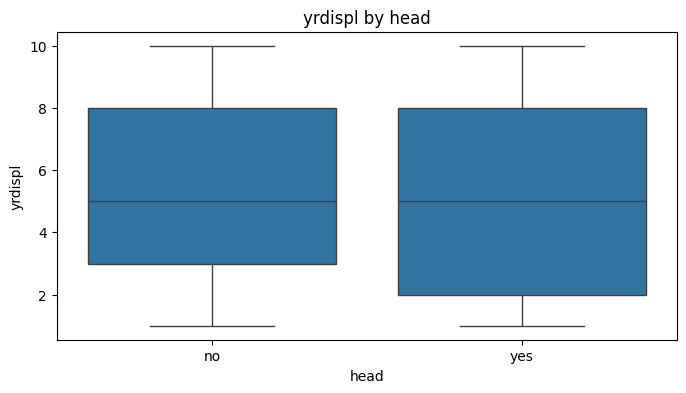

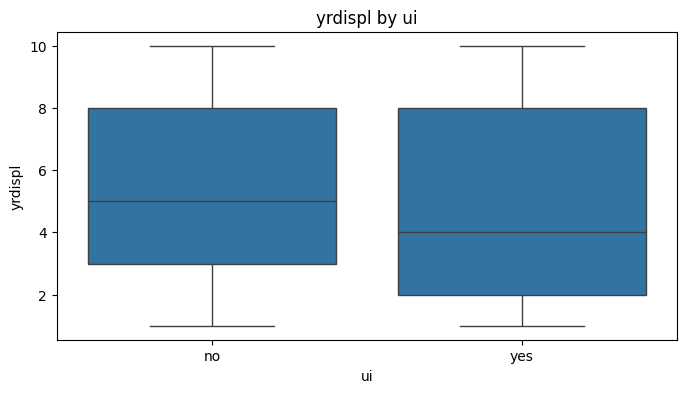

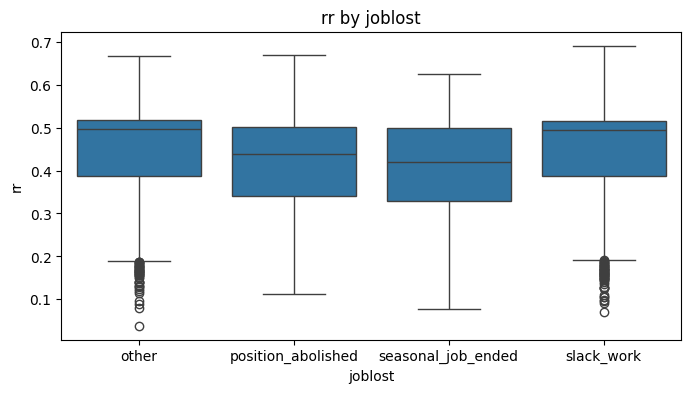

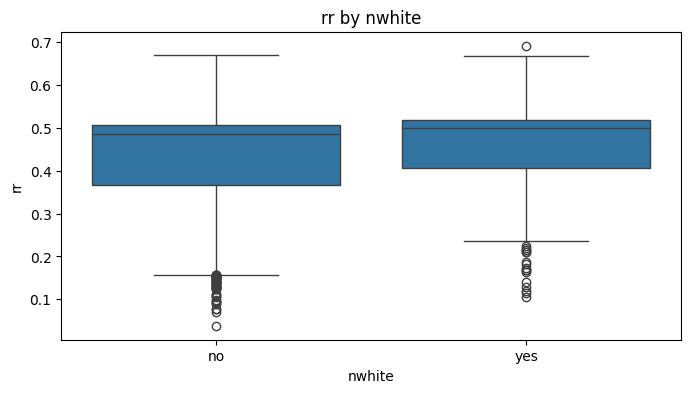

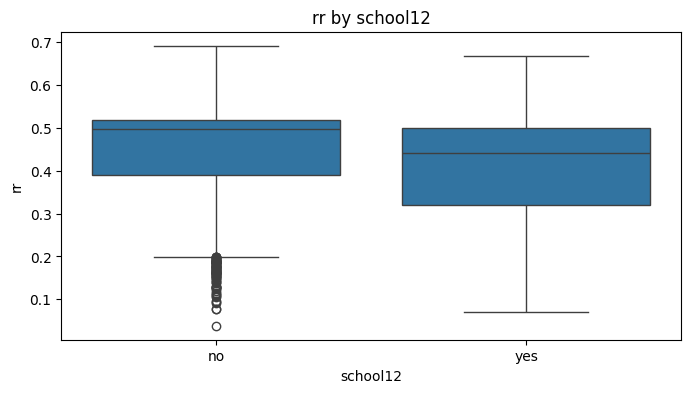

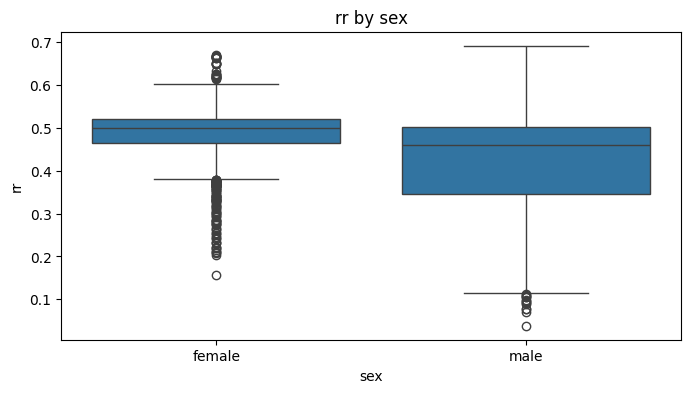

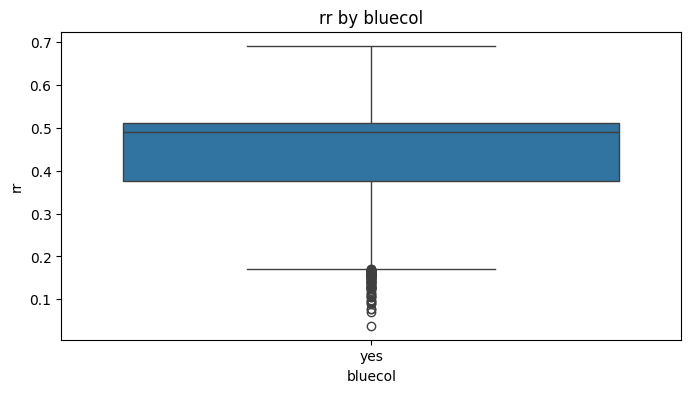

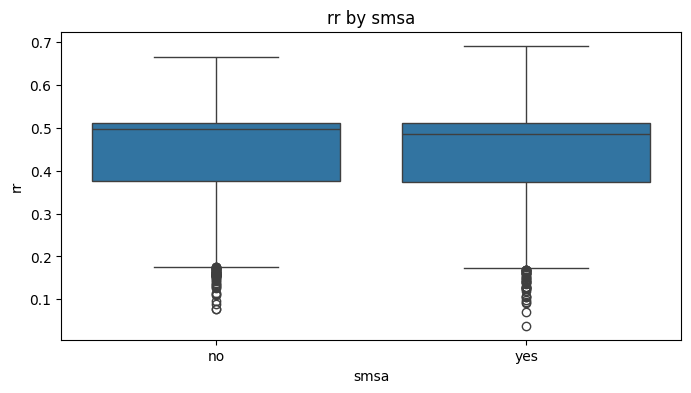

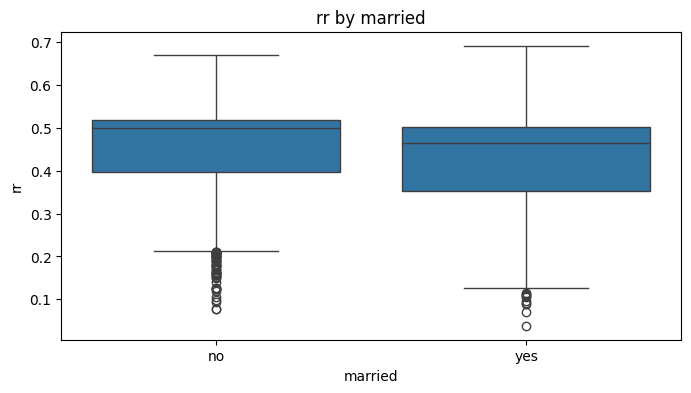

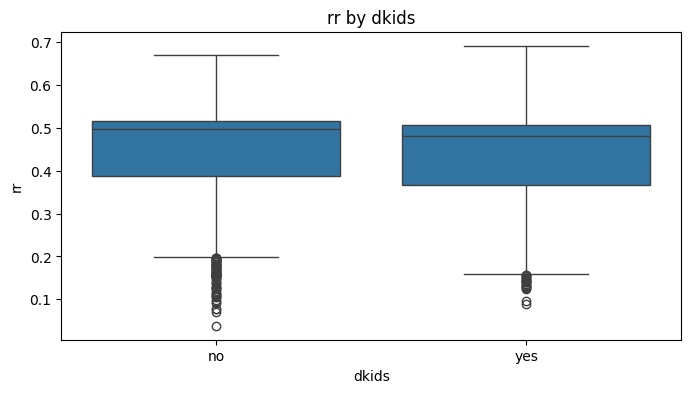

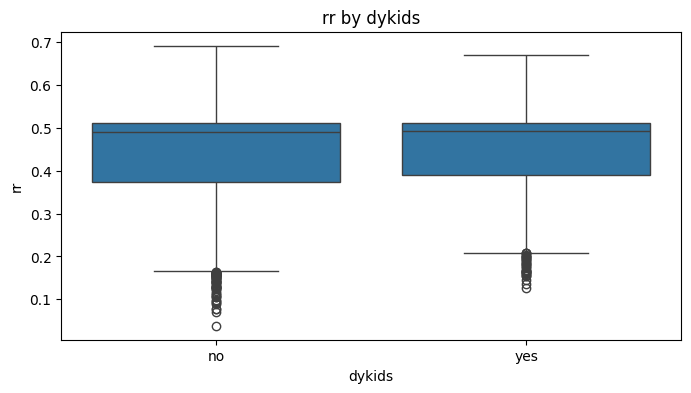

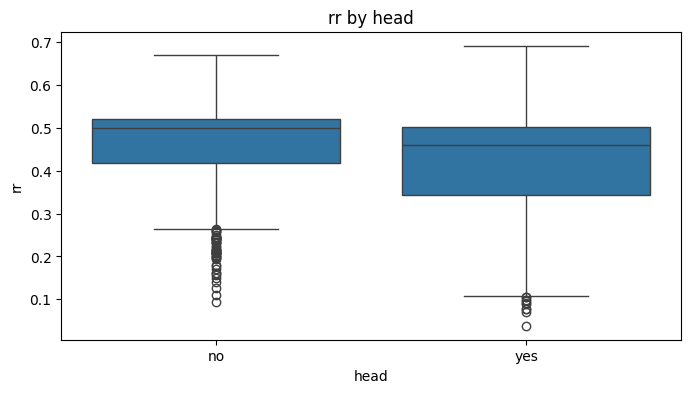

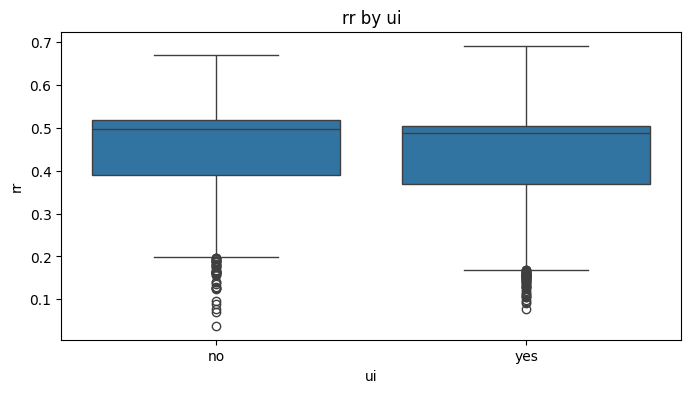


5. MULTIVARIATE ANALYSIS

5.1 Principal Component Analysis:


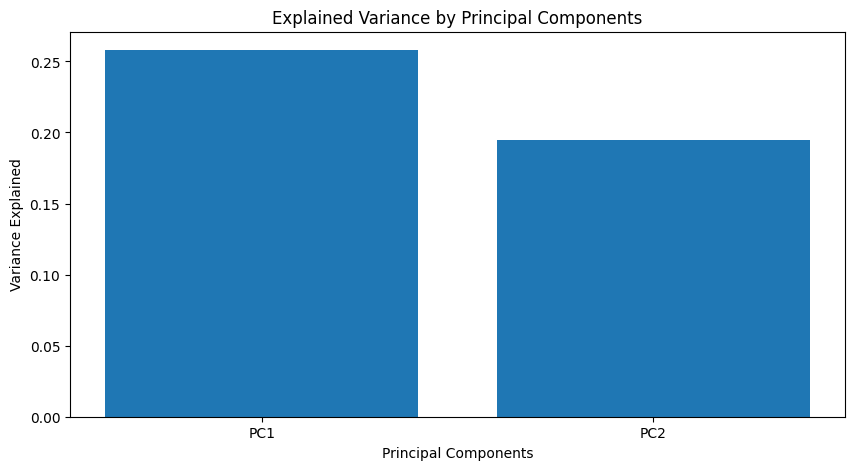


Analysis complete!


In [14]:
def main():

    data = load_and_explore_data("Benefits.csv")
    cleaned_data = clean_data(data)

    univariate_analysis(cleaned_data)
    bivariate_analysis(cleaned_data)
    multivariate_analysis(cleaned_data)

    print("\nAnalysis complete!")

if __name__ == "__main__":
    main()